House Prices from Kaggle!

First we import our libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew, kstest
from sklearn.preprocessing import StandardScaler
from scipy import stats

%matplotlib inline

Now we import our dataset

In [2]:
train_y = pd.read_csv('/home/yannis/Desktop/jupyter yannis/github/house/train.csv')
test_y = pd.read_csv('/home/yannis/Desktop/jupyter yannis/github/house//test.csv')
combine = [train_y, test_y]
train_y.shape , test_y.shape

((1460, 81), (1459, 80))

Also the best is to know with what we have to do

In [3]:
print(train_y.columns.values)

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

Also we want to know some thing about our data

In [4]:
train_y.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_y.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


Now we will see which features contain blank, null or empty values

In [6]:
train_y.info()
print('*_*'*15)
test_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Here we will examine the sale price (SalePrice), the Lot size in square feet (LotArea) and ground living area square feet (GrLivArea).

In [7]:
train_y[['SalePrice','LotArea','GrLivArea']].describe()

,SalePrice,LotArea,GrLivArea
count,1460.000000,1460.000000,1460.000000
mean,180921.195890,10516.828082,1515.463699
std,79442.502883,9981.264932,525.480383
min,34900.000000,1300.000000,334.000000
25%,129975.000000,7553.500000,1129.500000
50%,163000.000000,9478.500000,1464.000000
75%,214000.000000,11601.500000,1776.750000
max,755000.000000,215245.000000,5642.000000


Time for plots!

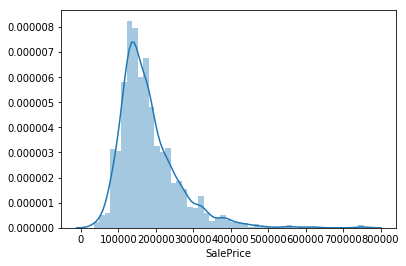

In [8]:
sns.distplot(train_y['SalePrice']);

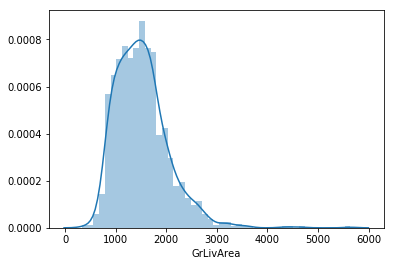

In [9]:
sns.distplot(train_y['GrLivArea']);

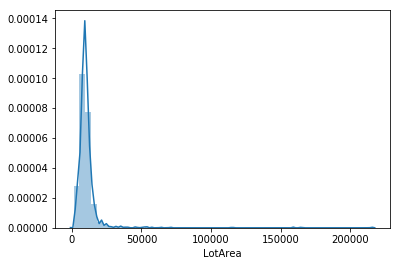

In [10]:
sns.distplot(train_y['LotArea']);

Now we will see who our data is going and we will see if we can to delete a little data! 

Text(0.5,0,'Living Area')

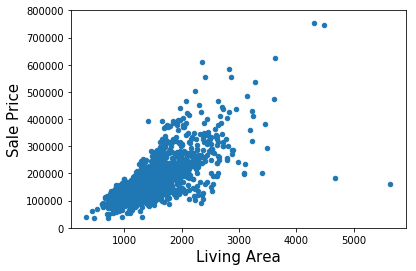

In [11]:
ax = 'GrLivArea'
data = pd.concat([train_y['SalePrice'], train_y[ax]], axis=1)
data.plot.scatter(x=ax, y='SalePrice', ylim=(0,800000));
plt.ylabel('Sale Price', fontsize=15)
plt.xlabel('Living Area', fontsize=15)

Text(0.5,0,'Lot size')

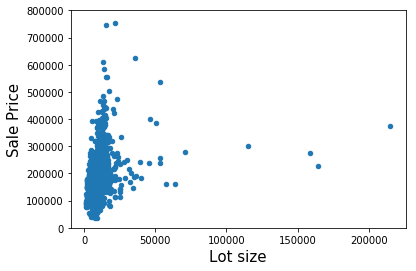

In [12]:
ax = 'LotArea'
data = pd.concat([train_y['SalePrice'], train_y[ax]], axis=1)
data.plot.scatter(x=ax, y='SalePrice', ylim=(0,800000));
plt.ylabel('Sale Price', fontsize=15)
plt.xlabel('Lot size', fontsize=15)

Text(0.5,0,'Living Area')

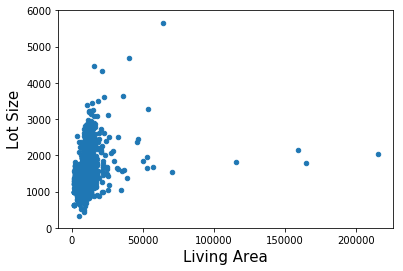

In [13]:
ax = 'LotArea'
data = pd.concat([train_y['GrLivArea'], train_y[ax]], axis=1)
data.plot.scatter(x=ax, y='GrLivArea', ylim=(0,6000));
plt.ylabel('Lot Size', fontsize=15)
plt.xlabel('Living Area', fontsize=15)

In all the above we can see a strong connection between of them!

We can take some plots betwwen the categorical features!!

Text(0.5,0,'Garage car capacity')

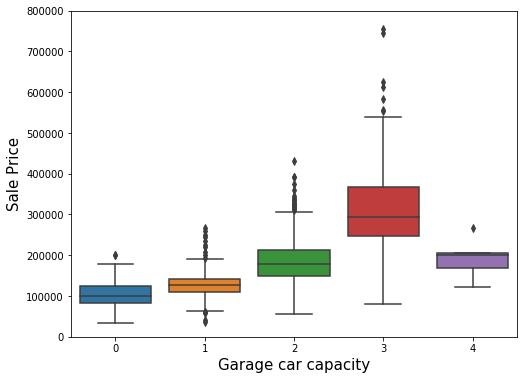

In [14]:
var = 'GarageCars'
data = pd.concat([train_y['SalePrice'], train_y[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.ylabel('Sale Price', fontsize=15)
plt.xlabel('Garage car capacity', fontsize=15)

Text(0.5,0,'Month that sold')

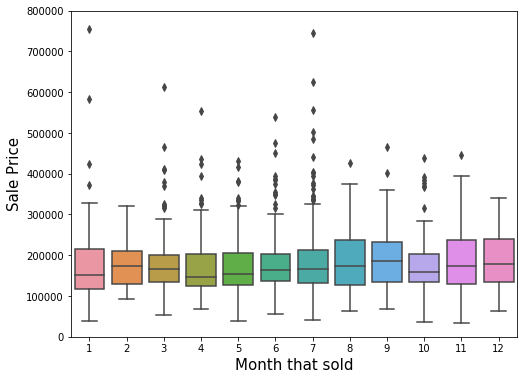

In [15]:
var = 'MoSold'
data = pd.concat([train_y['SalePrice'], train_y[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.ylabel('Sale Price', fontsize=15)
plt.xlabel('Month that sold', fontsize=15)

Symmarize, we can say that 'GrLivArea' and 'LotArea' seem to be linearly related with 'SalePrice'. 
Also as one variable increases, the other also increases.

Further 'GarageCars' and 'MoSold' also seem to be related with 'SalePrice'.

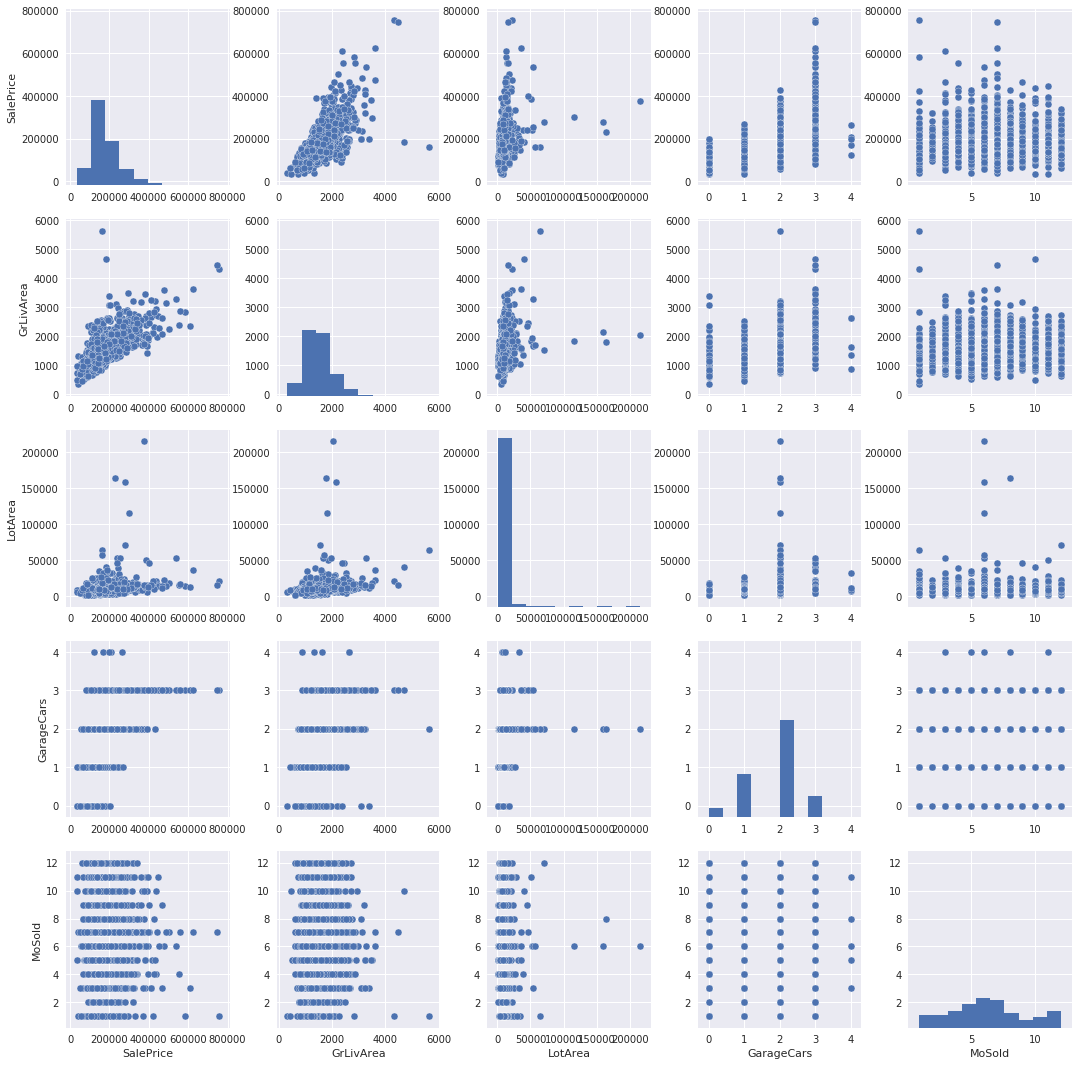

In [16]:
sns.set()
cols = ['SalePrice', 'GrLivArea', 'LotArea', 'GarageCars', 'MoSold']
sns.pairplot(train_y[cols], size = 3)
plt.show();

All the results give us a strong linear relationship, as we have seen above.

Now we have to haggle the missing data, it makes sence to have a lot of missing data
because all the house they dont have pools, or basement or garage etc.

In [17]:
total = train_y.isnull().sum().sort_values(ascending=False)
percent = (train_y.isnull().sum()/train_y.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(81)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


What we have to do with the missing data?
I decide that the best is not to delete the corresponding variable. 
If we see better the dataset of the missing data is from variables that
it is not important but the missing data told as that something does not exist.
For example the missing data in "PoolQC" it tells as that it does not exist pool,
this is the reason that no one fill it!
So in the variables that we have a lot of missing data we will fill it with none or 0.
In other variables where the missing data small we will fill them with the mean of the
existing data

In [18]:
train_y["PoolQC"] = train_y["PoolQC"].fillna("None")
train_y["MiscFeature"] =train_y["MiscFeature"].fillna("None")
train_y["Alley"] = train_y["Alley"].fillna("None")
train_y["Fence"] = train_y["Fence"].fillna("None")
train_y["FireplaceQu"] = train_y["FireplaceQu"].fillna("None")
train_y["LotFrontage"] = train_y.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train_y[col] = train_y[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    train_y[col] = train_y[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    train_y[col] = train_y[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train_y[col] = train_y[col].fillna('None')
train_y["MasVnrType"] = train_y["MasVnrType"].fillna("None")
train_y["MasVnrArea"] = train_y["MasVnrArea"].fillna(0)
train_y['MSZoning'] = train_y['MSZoning'].fillna(train_y['MSZoning'].mode()[0])
train_y = train_y.drop(['Utilities'], axis=1)
train_y["Functional"] = train_y["Functional"].fillna("Typ")
train_y['Electrical'] = train_y['Electrical'].fillna(train_y['Electrical'].mode()[0])
train_y['KitchenQual'] = train_y['KitchenQual'].fillna(train_y['KitchenQual'].mode()[0])
train_y['Exterior1st'] = train_y['Exterior1st'].fillna(train_y['Exterior1st'].mode()[0])
train_y['Exterior2nd'] = train_y['Exterior2nd'].fillna(train_y['Exterior2nd'].mode()[0])
train_y['SaleType'] = train_y['SaleType'].fillna(train_y['SaleType'].mode()[0])
train_y['MSSubClass'] = train_y['MSSubClass'].fillna("None")

Now we have to check if we have missing value

In [19]:
train_y_na = (train_y.isnull().sum() / len(train_y)) * 100
train_y_na = train_y_na.drop(train_y_na[train_y_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :train_y_na})
missing_data.head()

,Missing Ratio


Now we will she what happen as we have fix the missing data.
Also we will take:

1) Histogram - Kurtosis and skewness.


2) Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.

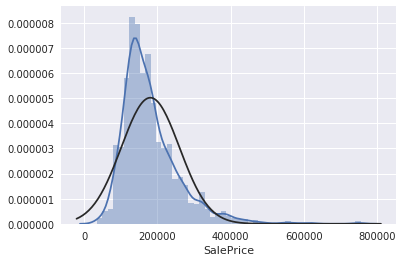

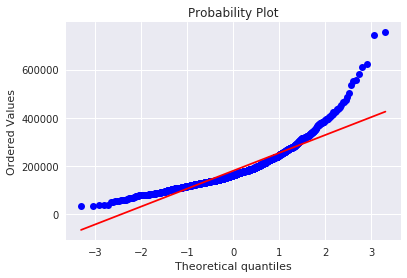

In [20]:
sns.distplot(train_y['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_y['SalePrice'], plot=plt)

In [22]:
train_y['SalePrice'] = np.log(train_y['SalePrice'])

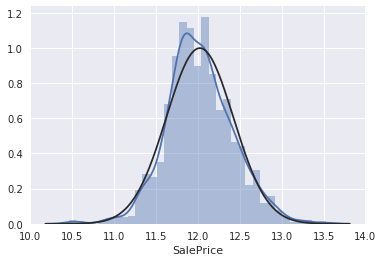

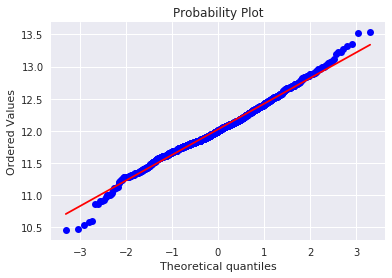

In [23]:
sns.distplot(train_y['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_y['SalePrice'], plot=plt)

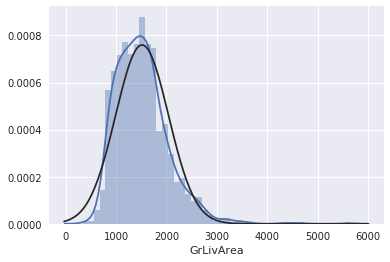

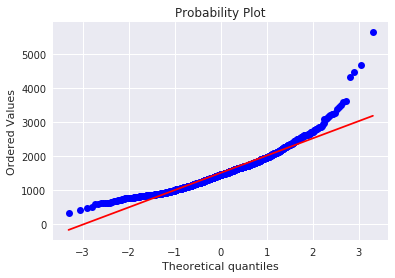

In [25]:
sns.distplot(train_y['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_y['GrLivArea'], plot=plt)

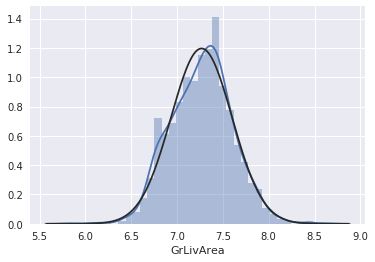

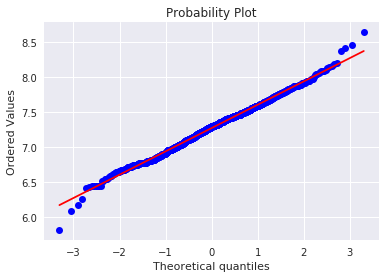

In [26]:
train_y['GrLivArea'] = np.log(train_y['GrLivArea'])
sns.distplot(train_y['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_y['GrLivArea'], plot=plt)

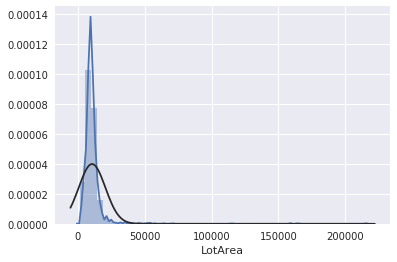

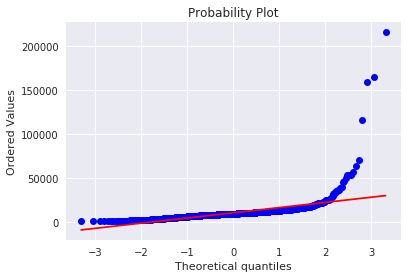

In [27]:
sns.distplot(train_y['LotArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_y['LotArea'], plot=plt)